## Importamos las librerias necesarias

In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [30]:
from sklearn.preprocessing import MinMaxScaler

## Manejo de archivos simplificado

In [3]:
# Manejo simplificado de archivos
files = os.listdir('./Complementary/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

In [4]:
dict_files

{'df1': 'air_quality_data.csv',
 'df2': 'car_noise.csv',
 'df3': 'fuel_consumption_ratings',
 'df4': 'yellow_taxis'}

In [ ]:
# Alternativamente es posible leer cada archivo por separado por ejemplo:
# df = pd.read_csv("./Complementary/air_quality_data.csv")

### Se abrirán los archivos relacionados en tema vehiculos, según el DER y se normalizaran datos y nombres de columnas, a modo de obtener los datos coherentes  y congruentes entres si.

_____________________________________________________

## Archivo 'air_quality_data.csv'

In [173]:
dict_files['df1']

'air_quality_data.csv'

In [174]:
df1 = pd.read_csv('./Complementary/' + dict_files['df1']) 
df1.head()

,aqi,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,5,2020/11/24,1815.80,211.00,79.51,0.0,7.87,63.81,90.35,14.06
1,5,2020/11/24,2056.12,239.61,80.20,0.0,8.35,77.15,110.21,15.07
2,5,2020/11/24,2189.64,257.49,79.51,0.0,8.94,86.94,126.06,16.47
3,5,2020/11/24,2349.85,278.95,80.88,0.0,9.30,96.19,141.36,15.58
4,5,2020/11/25,2109.53,246.76,76.08,0.0,7.99,83.11,129.25,9.12


#### **Análisis de las variables del dataset**

- 'aqi': El Índice de Calidad del Aire (ICA) es un número que se utiliza para comunicar la calidad general del aire a la población. Puede ser calculado de diferentes maneras, generalmente en función de los niveles de varios contaminantes del aire.


- 'dt': Esta es la fecha en que se registraron las mediciones de calidad del aire.


- 'co': Monóxido de carbono (CO) es un gas incoloro e inodoro que puede ser perjudicial para la salud humana en altas concentraciones. Se deriva principalmente de la combustión incompleta de carbono en motores de automóviles y otras fuentes.


- 'no': Óxido nítrico (NO) es un gas producido principalmente por la quema de combustibles fósiles. Puede contribuir a la formación de smog y al deterioro de la calidad del aire.


- 'no2': Dióxido de nitrógeno (NO2) es otro gas relacionado con la quema de combustibles fósiles. Puede causar problemas respiratorios y contribuir a la formación de smog.


- 'o3': Ozono (O3) en la troposfera es un contaminante del aire que puede ser perjudicial para la salud. Se forma a partir de reacciones químicas entre óxidos de nitrógeno y compuestos orgánicos volátiles en presencia de la luz solar.


- 'so2': Dióxido de azufre (SO2) es un gas que se produce por la quema de combustibles fósiles, especialmente en plantas de energía y procesos industriales. Puede tener efectos negativos en la salud y el medio ambiente.


- 'pm2_5': Partículas finas (PM2.5) son partículas suspendidas en el aire que tienen un diámetro de 2.5 micrómetros o menos. Pueden penetrar profundamente en los pulmones y estar relacionadas con problemas de salud respiratoria.


- 'pm10': Partículas en suspensión (PM10) son partículas con un diámetro de 10 micrómetros o menos. Aunque son más grandes que las PM2.5, aún pueden tener efectos negativos en la salud.


- 'nh3': Amoníaco (NH3) es un gas que puede provenir de fuentes agrícolas y de la industria. Puede contribuir a la formación de partículas y afectar la calidad del aire.

In [175]:
df1.columns

Index(['aqi', 'dt', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [176]:
df1. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aqi     9616 non-null   int64  
 1   dt      9616 non-null   object 
 2   co      9616 non-null   float64
 3   no      9616 non-null   float64
 4   no2     9616 non-null   float64
 5   o3      9616 non-null   float64
 6   so2     9616 non-null   float64
 7   pm2_5   9616 non-null   float64
 8   pm10    9616 non-null   float64
 9   nh3     9616 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 751.4+ KB


<Axes: >

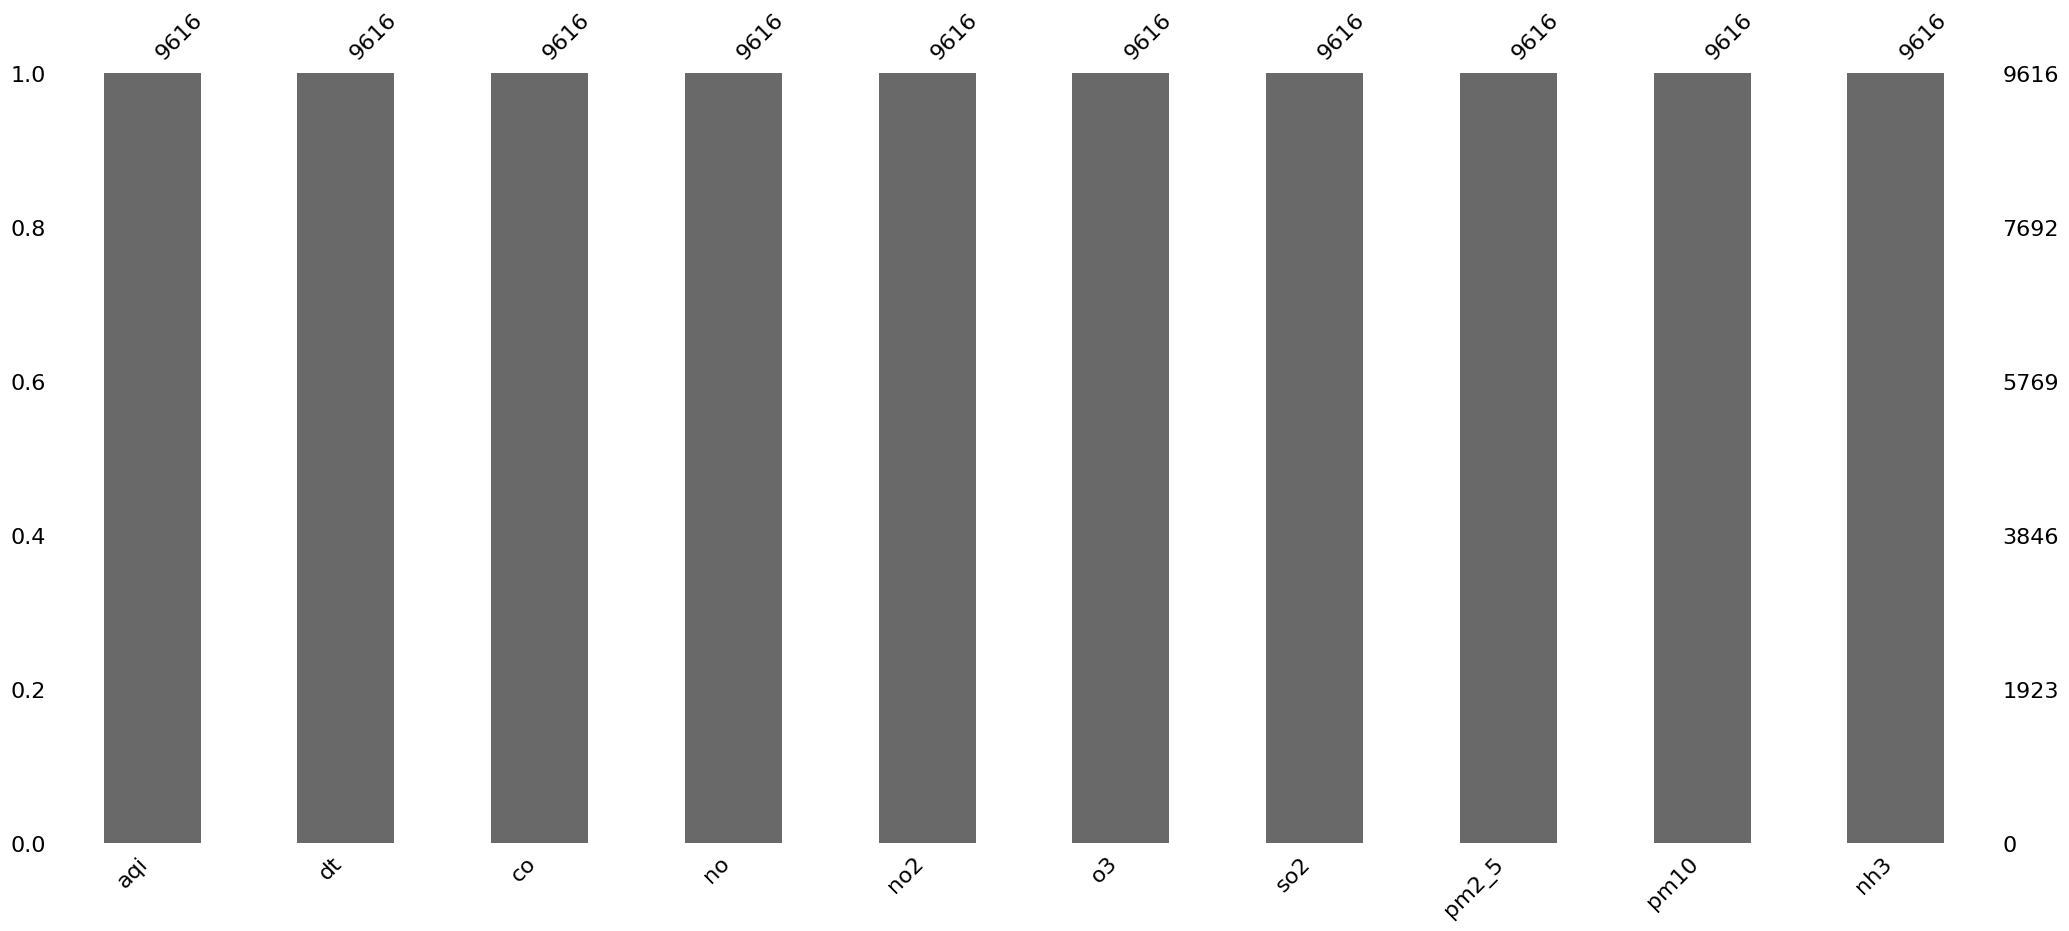

In [17]:
msno.bar(df1)

En este caso no se cuenta con columnas sin valores. 

In [177]:
# Convertir la columna 'dt' a objetos de fecha
df1['dt'] = pd.to_datetime(df1['dt'])

# Extraer los años de la columna 'dt' (nueva columna = "year")
df1['year'] = df1['dt'].dt.year

# Hallar el mínimo y el máximo de años
min_year = df1['year'].min()
max_year = df1['year'].max()

# Resultados
print(f"Año mínimo: {min_year}")
print(f"Año máximo: {max_year}")

Año mínimo: 2020
Año máximo: 2021


In [178]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   aqi     9616 non-null   int64         
 1   dt      9616 non-null   datetime64[ns]
 2   co      9616 non-null   float64       
 3   no      9616 non-null   float64       
 4   no2     9616 non-null   float64       
 5   o3      9616 non-null   float64       
 6   so2     9616 non-null   float64       
 7   pm2_5   9616 non-null   float64       
 8   pm10    9616 non-null   float64       
 9   nh3     9616 non-null   float64       
 10  year    9616 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 788.9 KB


Los registros de este archivo corresponden a los años 2020 a 2021.

Podemos notar que las emisiones de CO (monoxido de carbono) son superiores al resto de los gases.

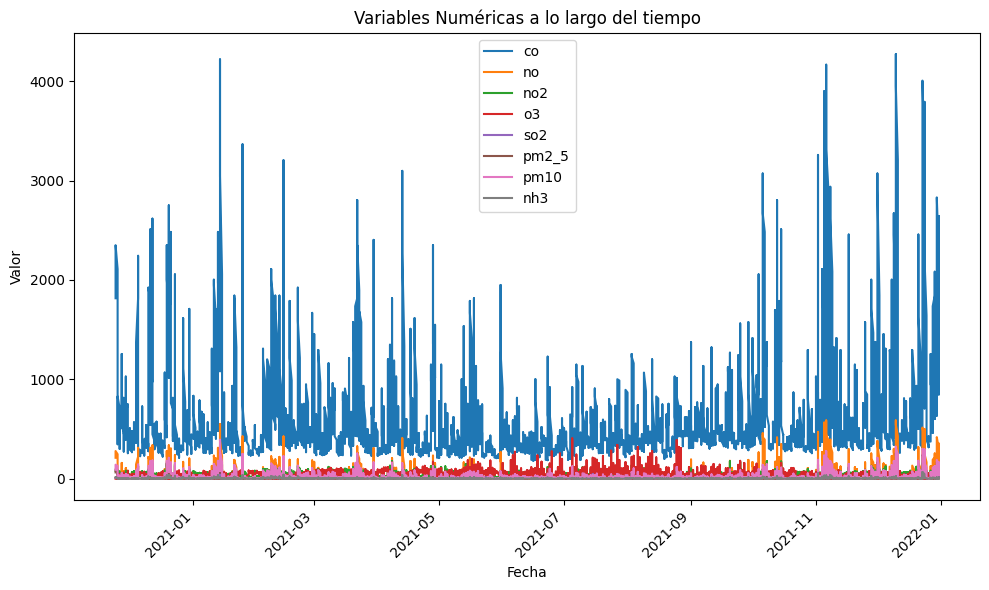

In [179]:
df1_graf = df1.copy()
# Seleccionar las variables numéricas
numeric_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Configurar el DataFrame para usar 'dt' como índice
df1_graf.set_index('dt', inplace=True)

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
df1_graf[numeric_columns].plot(ax=plt.gca())

# Personalizar el gráfico
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Variables Numéricas a lo largo del tiempo')
plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Podemos notar que el registro anual marca diferencias en el promedio de las emisiones de los gases de efecto invernadero.

<Figure size 1000x600 with 0 Axes>

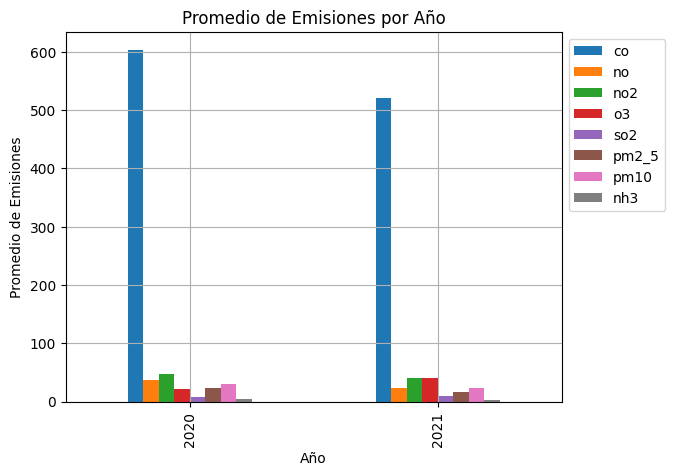

In [180]:
# Agrupar por año y calcular el promedio de las columnas de emisiones
emisiones = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
promedio_emision_anual = df1_graf.groupby('year')[emisiones].mean()

# Graficar el promedio de emisiones por año 
plt.figure(figsize=(10, 6))
ax = promedio_emision_anual.plot(kind='bar')
plt.title('Promedio de Emisiones por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Emisiones')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Es posible analizar los valores de los meses en los años registrados. 

<Figure size 1000x600 with 0 Axes>

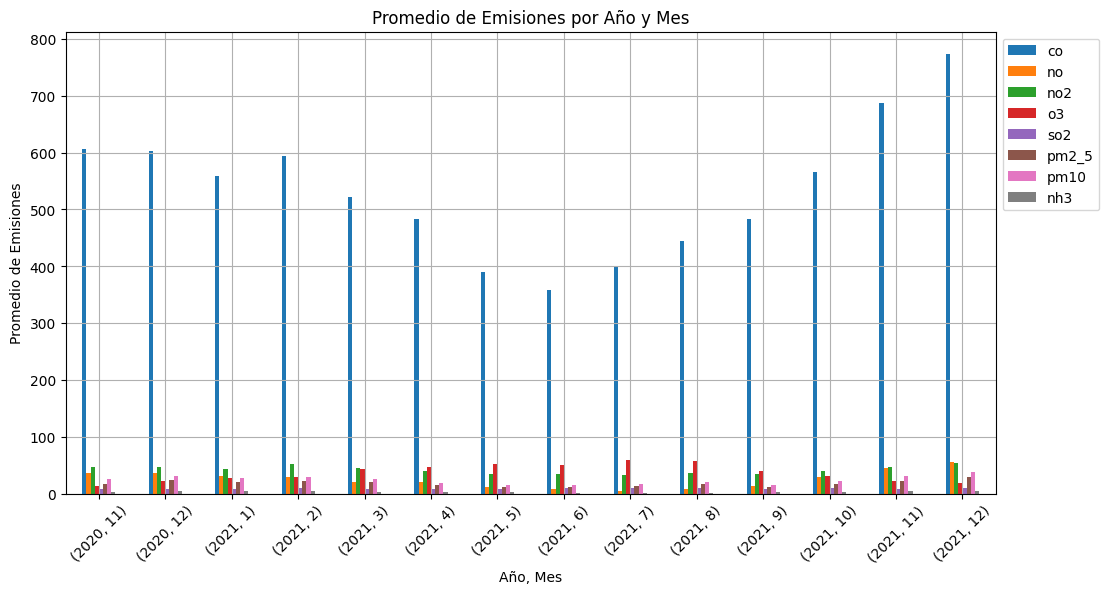

In [181]:
df1_graf = df1.copy()

emisiones = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df1_graf['Year'] = df1_graf['dt'].dt.year
df1_graf['Month'] = df1_graf['dt'].dt.month
emisiones_anio_mes = df1_graf.groupby(['Year', 'Month'])[emisiones].mean()

# Graficar el promedio de emisiones por año y mes (gráfico de columnas)
plt.figure(figsize=(10, 6))
emisiones_anio_mes.plot(kind='bar', figsize=(12, 6))
plt.title('Promedio de Emisiones por Año y Mes')
plt.xlabel('Año, Mes')
plt.ylabel('Promedio de Emisiones')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Se recomienda utilizar las emisiones de CO en futuros análisis ya que son los valores más representativos 

In [182]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   aqi     9616 non-null   int64         
 1   dt      9616 non-null   datetime64[ns]
 2   co      9616 non-null   float64       
 3   no      9616 non-null   float64       
 4   no2     9616 non-null   float64       
 5   o3      9616 non-null   float64       
 6   so2     9616 non-null   float64       
 7   pm2_5   9616 non-null   float64       
 8   pm10    9616 non-null   float64       
 9   nh3     9616 non-null   float64       
 10  year    9616 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 788.9 KB


#### Se renombran las columnas del datset

In [183]:
nuevos_nombres = {
    'aqi': 'ICA',
    'dt': 'Fecha',
    'co': 'CO',
    'no': 'NO',
    'no2': 'NO2',
    'o3': 'O3',
    'so2': 'SO3',
    'pm2_5': 'PM_2.5',
    'pm10': 'PM_10',
    'nh3': 'NH3',
    'year': 'Anio'
}

df1.rename(columns=nuevos_nombres, inplace=True)

In [184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ICA     9616 non-null   int64         
 1   Fecha   9616 non-null   datetime64[ns]
 2   CO      9616 non-null   float64       
 3   NO      9616 non-null   float64       
 4   NO2     9616 non-null   float64       
 5   O3      9616 non-null   float64       
 6   SO3     9616 non-null   float64       
 7   PM_2.5  9616 non-null   float64       
 8   PM_10   9616 non-null   float64       
 9   NH3     9616 non-null   float64       
 10  Anio    9616 non-null   int32         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 788.9 KB


#### Exportar el df a la carpeta correspondiente

In [ ]:
#df1.to_csv('./normalizados/complementarios/' + dict_files['df1'], index=False)

_________________________________________________

### Archivo 'car_noise.csv'

In [59]:
dict_files['df2']

'car_noise.csv'

In [225]:
df2 = pd.read_csv('./Complementary/' + dict_files['df2']) 
df2.head()

,Brand,Model,Spec,Year,dB at idle,dB at 55 mph,dB at 65 mph,dB at 70 mph,dB at 75 mph,dB at 85 mph
0,Abarth,500,1.4 16v T-Jet,2008,47.3,67.3,70.2,70.4,72.9,75.6
1,Abarth,595,Competizione,2017,49.9,69.1,72.5,72.8,72.2,75.8
2,Acura,MDX,3.5 V6,2013,41.7,59.0,62.0,62.2,64.9,65.9
3,Acura,RDX,3.5 V6,2012,43.0,62.7,66.1,66.3,68.4,69.1
4,Acura,RL,3.7 V6,2009,43.6,64.3,67.9,68.1,71.3,72.4


#### **Análisis de las variables del dataset**

- 'Brand': Representa la marca del vehículo.

- 'Model': Representa el modelo del vehículo.

- 'Spec': Puede representar las especificaciones del vehículo, como la versión o el tipo de motor.

- 'Year': Representa el año de fabricación del vehículo.

- 'dB at idle': Representa el nivel de ruido en decibelios (dB) producido por el vehículo cuando está en ralentí (parado sin moverse).

- 'dB at 55 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 55 millas por hora (aproximadamente 88.5 km/h).

- 'dB at 65 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 65 millas por hora (aproximadamente 104.6 km/h).

- 'dB at 70 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 70 millas por hora (aproximadamente 112.7 km/h).

- 'dB at 75 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 75 millas por hora (aproximadamente 120.7 km/h).

- 'dB at 85 mph': Representa el nivel de ruido en decibelios (dB) producido por el vehículo a una velocidad de 85 millas por hora (aproximadamente 136.8 km/h).

In [216]:
df2.columns

Index(['Brand', 'Model', 'Spec', 'Year', 'dB at idle', 'dB at 55 mph',
       'dB at 65 mph', 'dB at 70 mph', 'dB at 75 mph', 'dB at 85 mph'],
      dtype='object')

<Axes: >

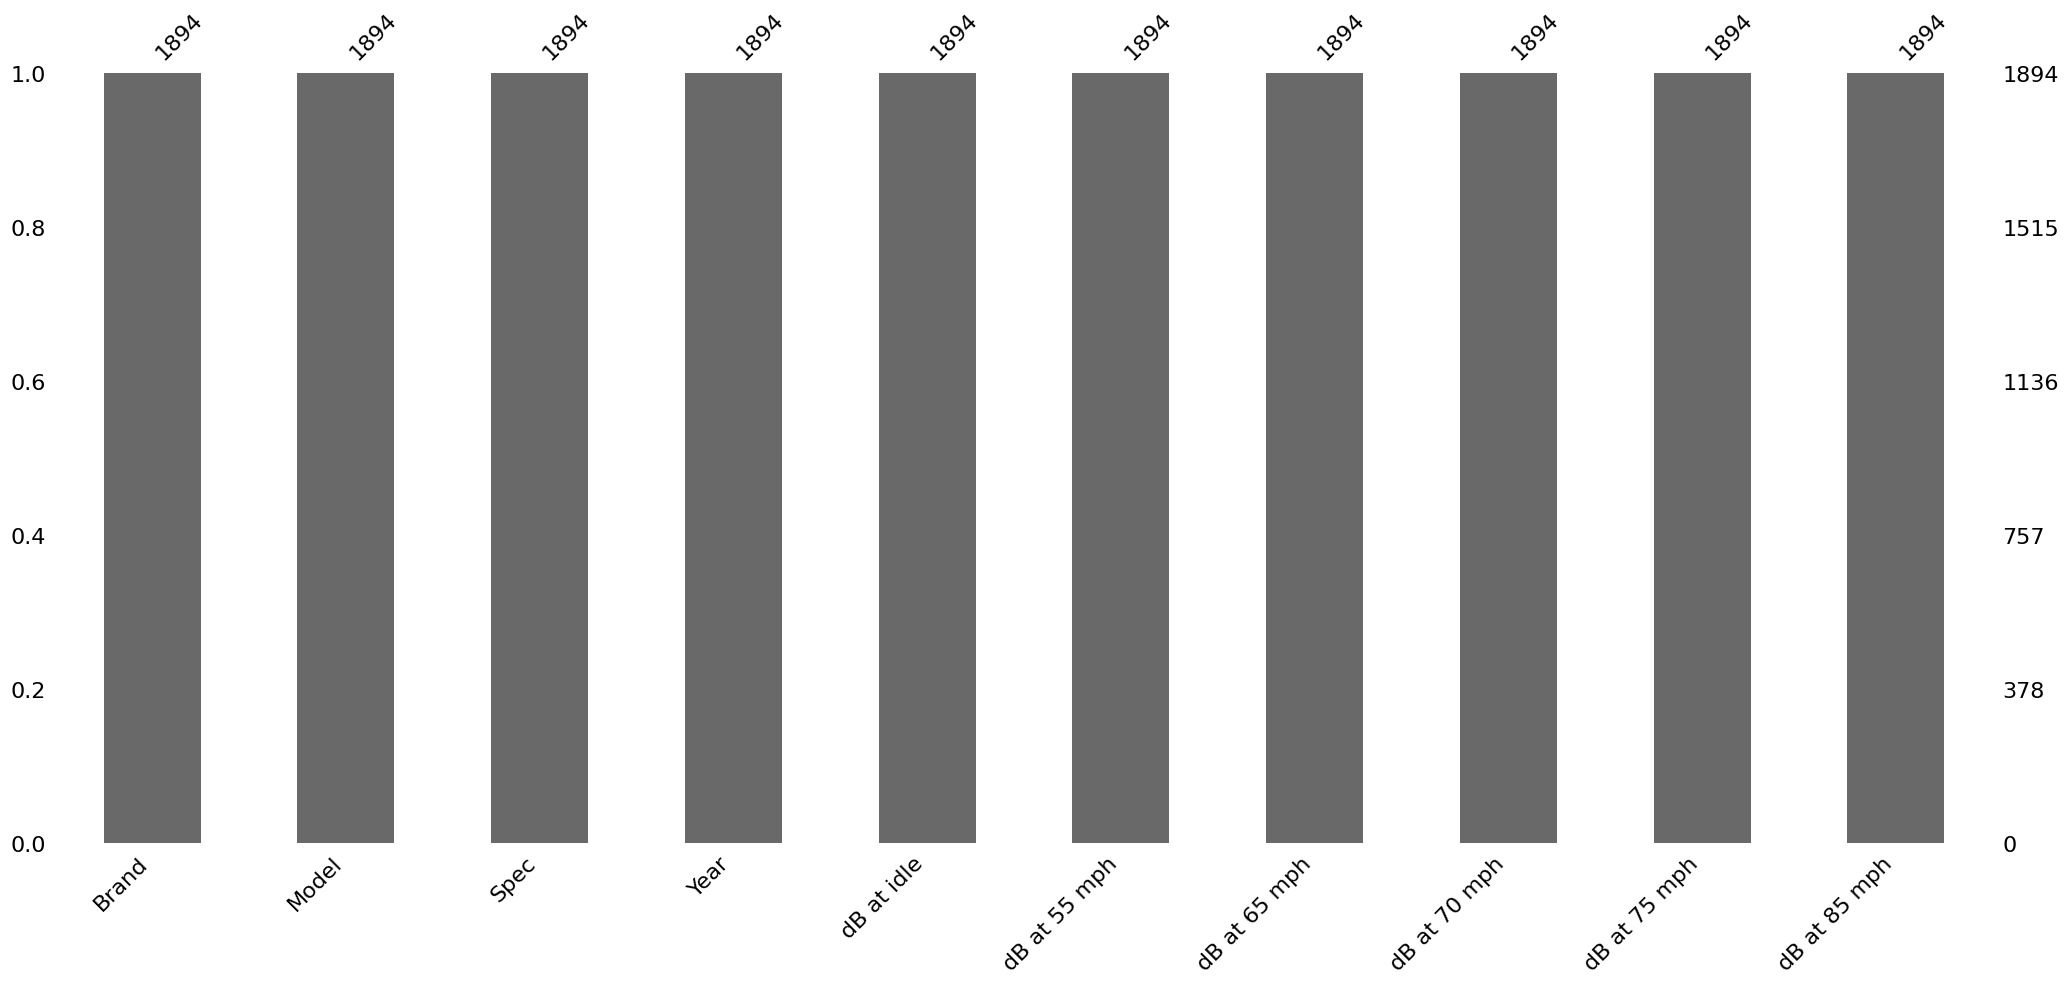

In [62]:
msno.bar(df2)

In [ ]:
En este caso no se cuenta con columnas sin valores. 

In [217]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         1894 non-null   object 
 1   Model         1894 non-null   object 
 2   Spec          1894 non-null   object 
 3   Year          1894 non-null   int64  
 4   dB at idle    1894 non-null   float64
 5   dB at 55 mph  1894 non-null   float64
 6   dB at 65 mph  1894 non-null   float64
 7   dB at 70 mph  1894 non-null   float64
 8   dB at 75 mph  1894 non-null   float64
 9   dB at 85 mph  1894 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 148.1+ KB


Se considera filtrar los modelos más nuevos de vehiculos en el dataset. No obstante los valores registrados en el mismo van desde 2008 a 2018.

In [226]:
min_year = df2['Year'].min()
max_year = df2['Year'].max()
print("Año mínimo:", min_year)
print("Año máximo:", max_year)

Año mínimo: 2008
Año máximo: 2018


#### Análisis de duplicados

Se procede a revisar la combinacion de información y los valores repetidos. 
En este caso, tanto la marca (Brand), el modelo (model), y sus respectivas especificaciones del motor (spec) pueden encontrarse vinculadas, por lo que se suma el valor del año de lanzamiento (year) para encontrar aquellas filas que dupliquen la información

Los valores registrados de duplicados en este dataset muestran que al considerar: marca, modelo, especificaciones y año, hay 90 filas de valores duplicados. (Opción 1)

Pero si se suma a lo anterior las mediciones de "db at idle", los valores registrados de duplicados son 14. (Opción 2)

La combinación de marca, modelo, especificaciones, año, y "dB at 55 mph" indica un valor de 16 (Opción 3)

In [227]:
# OPCION 1
df2_analisis = df2.copy()
# Crear una nueva columna combinando 'Brand', 'Model', 'Spec' y 'Year'
df2_analisis['Combinadas1'] = df2_analisis['Brand'] + '-' + df2_analisis['Model'] + '-' + df2_analisis['Spec'] + '-' + df2_analisis['Year'].astype(str)

# Identificar filas duplicadas basadas en la columna combinada
filas_duplicadas = df2_analisis[df2_analisis['Combinadas1'].duplicated(keep=False)]

# Mostrar las filas duplicadas
if not filas_duplicadas.empty:
    print("Filas duplicadas:")
    print(filas_duplicadas[['Brand', 'Model', 'Spec', 'Year', 'Combinadas1']])
else:
    print("No se encontraron filas duplicadas.")


Filas duplicadas:
           Brand    Model     Spec  Year                     Combinadas1
89          Audi       A6  2.0 TDI  2016            Audi-A6-2.0 TDI-2016
90          Audi       A6  2.0 TDI  2016            Audi-A6-2.0 TDI-2016
123         Audi       Q5  2.0 TDI  2017            Audi-Q5-2.0 TDI-2017
124         Audi       Q5  2.0 TDI  2017            Audi-Q5-2.0 TDI-2017
218          BMW        3     328i  2012                 BMW-3-328i-2012
...          ...      ...      ...   ...                             ...
1708      Toyota  Verso-S      1.3  2011         Toyota-Verso-S-1.3-2011
1755  Volkswagen     Golf      1.0  2016        Volkswagen-Golf-1.0-2016
1756  Volkswagen     Golf      1.0  2016        Volkswagen-Golf-1.0-2016
1778  Volkswagen   Passat  1.4 TSI  2011  Volkswagen-Passat-1.4 TSI-2011
1779  Volkswagen   Passat  1.4 TSI  2011  Volkswagen-Passat-1.4 TSI-2011

[90 rows x 5 columns]


In [228]:
# OPCION 2
# Crear una nueva columna combinando 'Brand', 'Model', 'Spec', 'Year' y 'dB at idle'
df2_analisis['Combinadas2'] = df2_analisis['Brand'] + '-' + df2_analisis['Model'] + '-' + df2_analisis['Spec'] + '-' + df2_analisis['Year'].astype(str) + '-' + df2_analisis['dB at idle'].astype(str)

# Identificar filas duplicadas basadas en la columna combinada
filas_duplicadas = df2_analisis[df2_analisis['Combinadas2'].duplicated(keep=False)]

# Mostrar las filas duplicadas
if not filas_duplicadas.empty:
    print("Filas duplicadas:")
    print(filas_duplicadas[['Brand', 'Model', 'Spec', 'Year', 'dB at idle', 'Combinadas2']])
    print("Cantidad de filas duplicadas:", len(filas_duplicadas))
else:
    print("No se encontraron filas duplicadas.")



Filas duplicadas:
         Brand    Model                 Spec  Year  dB at idle  \
123       Audi       Q5              2.0 TDI  2017        41.9   
124       Audi       Q5              2.0 TDI  2017        41.9   
929      Mazda        3             1.6 CITD  2011        44.7   
930      Mazda        3             1.6 CITD  2011        44.7   
944      Mazda        6  2.2 CiTD Stationcar  2011        43.1   
945      Mazda        6  2.2 CiTD Stationcar  2011        43.1   
990   Mercedes        C                  180  2011        44.9   
991   Mercedes        C                  180  2011        44.9   
1298   Peugeot      308              1.6 HDI  2011        44.7   
1299   Peugeot      308              1.6 HDI  2011        44.7   
1613    Suzuki  Kizashi                  2.4  2011        44.7   
1614    Suzuki  Kizashi                  2.4  2011        44.7   
1707    Toyota  Verso-S                  1.3  2011        45.6   
1708    Toyota  Verso-S                  1.3  2011        

In [229]:
# OPCION 3
# Crear una nueva columna combinando 'Brand', 'Model', 'Spec', 'Year' y 'dB at 55 mph'
df2_analisis['Combinadas3'] = df2_analisis['Brand'] + '-' + df2_analisis['Model'] + '-' + df2_analisis['Spec'] + '-' + df2_analisis['Year'].astype(str) + '-' + df2_analisis['dB at 55 mph'].astype(str)

# Identificar filas duplicadas basadas en la columna combinada
filas_duplicadas = df2_analisis[df2_analisis['Combinadas3'].duplicated(keep=False)]

# Mostrar las filas duplicadas
if not filas_duplicadas.empty:
    print("Filas duplicadas:")
    print(filas_duplicadas[['Brand', 'Model', 'Spec', 'Year', 'dB at idle','dB at 55 mph', 'Combinadas3']])
    print("Cantidad de filas duplicadas:", len(filas_duplicadas))
else:
    print("No se encontraron filas duplicadas.")

Filas duplicadas:
         Brand    Model                 Spec  Year  dB at idle  dB at 55 mph  \
123       Audi       Q5              2.0 TDI  2017        41.9          61.6   
124       Audi       Q5              2.0 TDI  2017        41.9          61.6   
929      Mazda        3             1.6 CITD  2011        44.7          63.6   
930      Mazda        3             1.6 CITD  2011        44.7          63.6   
944      Mazda        6  2.2 CiTD Stationcar  2011        43.1          61.3   
945      Mazda        6  2.2 CiTD Stationcar  2011        43.1          61.3   
990   Mercedes        C                  180  2011        44.9          63.8   
991   Mercedes        C                  180  2011        44.9          63.8   
1160    Nissan    Micra                  0.9  2017        44.5          62.2   
1161    Nissan    Micra                  0.9  2017        41.3          62.2   
1298   Peugeot      308              1.6 HDI  2011        44.7          63.5   
1299   Peugeot      30

Se procede a analizar todas las combinaciones en las columnas del dataset

In [230]:
df2['CombinadasTotal'] = df2.apply(lambda row: '-'.join([str(row[col]) for col in df2.columns]), axis=1)

# Identificar filas duplicadas basadas en la columna combinada
filas_duplicadas = df2[df2['CombinadasTotal'].duplicated(keep=False)]

# Mostrar las filas duplicadas y su cantidad
if not filas_duplicadas.empty:
    cuenta_duplicadas = filas_duplicadas.shape[0]
    print(f"Filas duplicadas: {cuenta_duplicadas}")
    print(filas_duplicadas)
else:
    print("No se encontraron filas duplicadas.")

Filas duplicadas: 14
         Brand    Model                 Spec  Year  dB at idle  dB at 55 mph  \
123       Audi       Q5              2.0 TDI  2017        41.9          61.6   
124       Audi       Q5              2.0 TDI  2017        41.9          61.6   
929      Mazda        3             1.6 CITD  2011        44.7          63.6   
930      Mazda        3             1.6 CITD  2011        44.7          63.6   
944      Mazda        6  2.2 CiTD Stationcar  2011        43.1          61.3   
945      Mazda        6  2.2 CiTD Stationcar  2011        43.1          61.3   
990   Mercedes        C                  180  2011        44.9          63.8   
991   Mercedes        C                  180  2011        44.9          63.8   
1298   Peugeot      308              1.6 HDI  2011        44.7          63.5   
1299   Peugeot      308              1.6 HDI  2011        44.7          63.5   
1613    Suzuki  Kizashi                  2.4  2011        44.7          63.5   
1614    Suzuki  Kiz

In [231]:
df2 = df2.drop(columns=['CombinadasTotal']) # eliminamos la columna creada previamente para el analisis

In [232]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         1894 non-null   object 
 1   Model         1894 non-null   object 
 2   Spec          1894 non-null   object 
 3   Year          1894 non-null   int64  
 4   dB at idle    1894 non-null   float64
 5   dB at 55 mph  1894 non-null   float64
 6   dB at 65 mph  1894 non-null   float64
 7   dB at 70 mph  1894 non-null   float64
 8   dB at 75 mph  1894 non-null   float64
 9   dB at 85 mph  1894 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 148.1+ KB


#### Renombramos las columnas

In [233]:
nuevos_nombres = {
    'Brand': 'Marca',
    'Model': 'Modelo',
    'Spec': 'Especificaciones',
    'Year': 'Anio',
    'dB at idle': 'dB ralentí',
    'dB at 55 mph': 'dB a 88.5 km/h',
    'dB at 65 mph': 'dB a 104.6 km/h',
    'dB at 70 mph': 'dB a 112.7 km/h',
    'dB at 75 mph': 'dB a 120.7 km/',
    'dB at 85 mph': 'dB a 136.8 km/h'
}

df2.rename(columns=nuevos_nombres, inplace=True)

In [236]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Marca             1894 non-null   object 
 1   Modelo            1894 non-null   object 
 2   Especificaciones  1894 non-null   object 
 3   Anio              1894 non-null   int64  
 4   dB ralentí        1894 non-null   float64
 5   dB a 88.5 km/h    1894 non-null   float64
 6   dB a 104.6 km/h   1894 non-null   float64
 7   dB a 112.7 km/h   1894 non-null   float64
 8   dB a 120.7 km/    1894 non-null   float64
 9   dB a 136.8 km/h   1894 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 148.1+ KB


Consideramos los automóviles (Marcas) con mayor promedio de ruido a una velocidad de 88.5 km/h

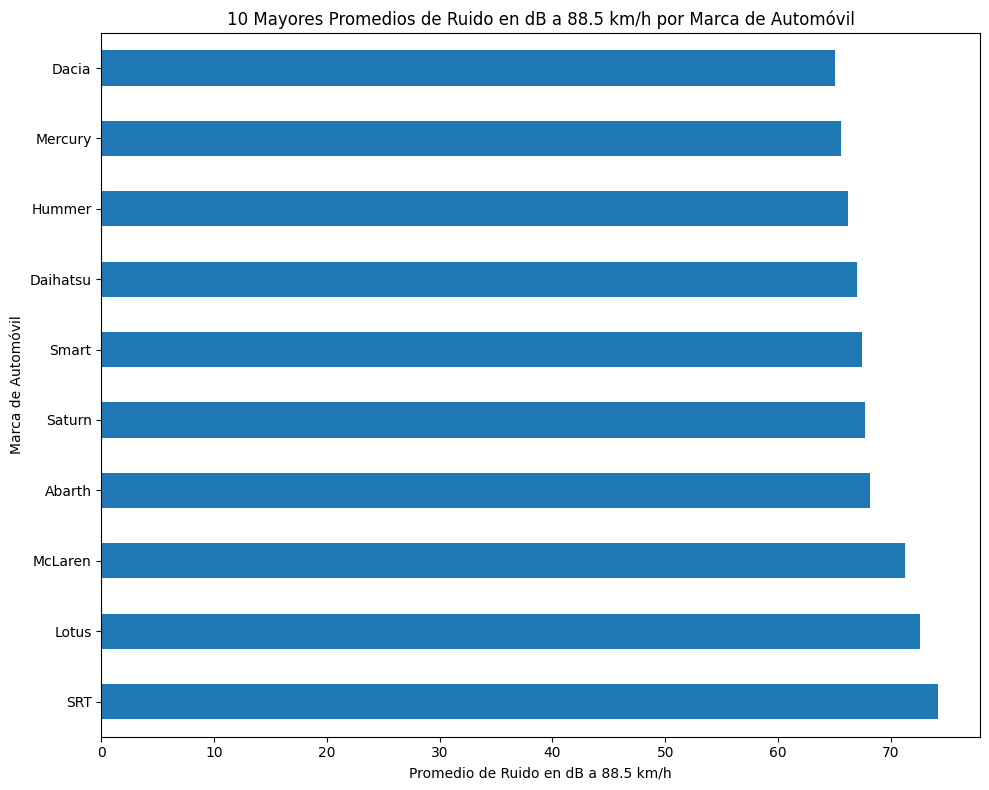

In [251]:
promedio_dB_88_5 = df2.groupby(['Marca'])['dB a 88.5 km/h'].mean()

# Seleccionar los 10 mayores valores
mayores_promedios = promedio_dB_88_5.nlargest(10)

# Crear un gráfico de barras horizontales
plt.figure(figsize=(10, 8))
mayores_promedios.plot(kind='barh')
plt.title('10 Mayores Promedios de Ruido en dB a 88.5 km/h por Marca de Automóvil')
plt.xlabel('Promedio de Ruido en dB a 88.5 km/h')
plt.ylabel('Marca de Automóvil')
plt.tight_layout()

# Mostrar 

In [ ]:
En cambio dentro de las que menor ruido generan a esa velocidad encontramos: 

In [252]:
promedio_dB_88_5 = df2.groupby(['Marca', 'Modelo'])['dB a 88.5 km/h'].mean()

# Seleccionar los 10 menores valores
menores_promedios = promedio_dB_88_5.nsmallest(10)

# Imprimir los 10 menores promedios
print("Los 10 menores promedios de ruido en dB a 88.5 km/h son:")
print(menores_promedios)


Los 10 menores promedios de ruido en dB a 88.5 km/h son:
Marca        Modelo         
Lexus        NX                 56.15
Hyundai      Kona               56.90
Lincoln      MKT                56.90
Volvo        D6                 56.90
Rolls Royce  Wraith             57.20
Bentley      Bentayga           57.35
Lexus        LS                 57.40
Acura        RLX                57.40
Kia          Niro               57.45
Land Rover   Discovery Sport    57.50
Name: dB a 88.5 km/h, dtype: float64


Se recomienda tener en cuenta dichos modelos al momento de seleccionar los vehiculos para la flota. 

#### Exportar el df a la carpeta correspondiente

In [ ]:
#df2.to_csv('./normalizados/complementarios/' + dict_files['df2'], index=False)

_______________________________________________________

### Archivos 'yellow_taxis' (parquet)

In [ ]:
dict_files['df3']

In [ ]:
df2 = pd.read_csv('./Complementary/' + dict_files['df2']) 
df2.head()

In [ ]:
df2.columns

In [ ]:
msno.bar(df1)

### Archivo 'car_noise.csv'

Min-Max Scaling: Escala los valores de las características para que estén dentro de un rango específico, generalmente entre 0 y 1. Esto se logra restando el valor mínimo y dividiendo por el rango (diferencia entre el valor máximo y el valor mínimo).

Z-Score (Standardization): Transforma los valores de las características para que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media y dividiendo por la desviación estándar.

Robust Scaling: Similar al Min-Max Scaling, pero utiliza estadísticas resistentes a valores atípicos, como la mediana y el rango intercuartil, en lugar de la media y la desviación estándar.

Max Abs Scaling: Escala los valores dividiendo por el valor absoluto máximo. Esto puede ser útil cuando los datos tienen valores muy grandes.

Unit Vector Scaling: También conocido como Normalización L2, escala los valores de manera que la norma (longitud) del vector de características sea igual a 1. Es útil cuando las magnitudes absolutas de los valores no son tan importantes como las direcciones relativas de las características.